# TensorFlow for Deep Learning - Representation Learning and Generative Learning (Autoencodes and GANs)

Credits:
- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
- [Udacity Deep Learning Nanodegree](https://www.udacity.com/course/deep-learning-nanodegree--nd101)

## Upsampling -- Interpolation vs Transposed Convolution

- [Upsampling by (Predefined) Interpolation linear e.g. _nearest neighbor, linear or bilinear interpolation_](https://youtu.be/KjztLwPksj8) **Upsample**
- [Upsampling by (Learnable) Transpose Convolutions](https://youtu.be/hnnLAC1Q0zg) **ConvTranspose2D**
- [Convolutional Autoencoder](https://youtu.be/QCA8QeZeDW8)
- [Convolutional Solution - Upsampling by Transpose Convolutions](https://youtu.be/2_Yw9LLomCo)
- [Convolutional Solution - Upsampling by Interpolation & Denoising](https://youtu.be/XX63da4EPN0)

Autoencoders and GANs are both unsupervised, they both learn dense
representations, they can both be used as generative models, and they have
many similar applications. However, they work very differently:

- Autoencoders simply learn to copy their inputs to their outputs.
This may sound like a trivial task, but we will see that constraining
the network in various ways can make it rather difficult. For
example, you can limit the size of the latent representations, or you
can add noise to the inputs and train the network to recover the
original inputs. These constraints prevent the autoencoder from
trivially copying the inputs directly to the outputs, which forces it
to learn efficient ways of representing the data. In short, the
codings are byproducts of the autoencoder learning the identity
function under some constraints.

- GANs are composed of two neural networks: a _generator_ that tries
to generate data that looks similar to the training data, and a
_discriminator_ that tries to tell real data from fake data. This
architecture is very original in Deep Learning in that the generator
and the discriminator compete against each other during training:
the generator is often compared to a criminal trying to make
realistic counterfeit money, while the discriminator is like the
police investigator trying to tell real money from fake. _Adversarial 
training_ (training competing neural networks) is widely considered
as one of the most important ideas in recent years. In 2016, Yann
LeCun even said that it was "the most interesting idea in the last 10
years in Machine Learning."

## Autoencoders

- An autoencoder is always composed of two parts: an encoder (or recognition
network) that converts the inputs to a latent representation, followed by a
decoder (or generative network) that converts the internal representation to
the outputs. 

- The outputs are often called the _reconstructions_ because the autoencoder
tries to reconstruct the inputs, and the cost function contains a 
_reconstruction loss_ that penalizes the model when the reconstructions are
different from the inputs.

- Because the internal representation has a lower dimensionality than the
input data (it is 2D instead of 3D), the autoencoder is said to be
_undercomplete_. An undercomplete autoencoder cannot trivially copy its
inputs to the codings, yet it must find a way to output a copy of its inputs. It
is forced to learn the most important features in the input data (and drop the
unimportant ones).

### Performing PCA with an Undercomplete Linear Autoencoder

If the autoencoder uses only linear activations and the cost function is the
mean squared error (MSE), then it ends up performing Principal
Component Analysis. 

In [1]:
import numpy as np
from tensorflow import keras

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder]) 
 
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.1))

history = autoencoder.fit(X_train, X_train, epochs=20)
codings = encoder.predict(X_train)

2021-12-02 23:40:40.306276: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38457 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:31:00.0, compute capability: 8.0
2021-12-02 23:40:40.308534: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38457 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:32:00.0, compute capability: 8.0
2021-12-02 23:40:40.310251: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38457 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:ca:00.0, compute capability: 8.0
2021-12-02 23:40:40.311948: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 38457 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bu

Epoch 1/20
2/2 [==============================] - 1s 2ms/step - loss: 0.4311
Epoch 2/20
2/2 [==============================] - 0s 1ms/step - loss: 0.3385
Epoch 3/20
2/2 [==============================] - 0s 1ms/step - loss: 0.2815
Epoch 4/20
2/2 [==============================] - 0s 1ms/step - loss: 0.2435
Epoch 5/20
2/2 [==============================] - 0s 1ms/step - loss: 0.2148
Epoch 6/20
2/2 [==============================] - 0s 1ms/step - loss: 0.1932
Epoch 7/20
2/2 [==============================] - 0s 1ms/step - loss: 0.1761
Epoch 8/20
2/2 [==============================] - 0s 1ms/step - loss: 0.1617
Epoch 9/20
2/2 [==============================] - 0s 1ms/step - loss: 0.1494
Epoch 10/20
2/2 [==============================] - 0s 1ms/step - loss: 0.1383
Epoch 11/20
2/2 [==============================] - 0s 1ms/step - loss: 0.1283
Epoch 12/20
2/2 [==============================] - 0s 1ms/step - loss: 0.1201
Epoch 13/20
2/2 [==============================] - 0s 1ms/step - loss: 0.

2021-12-02 23:40:42.546114: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


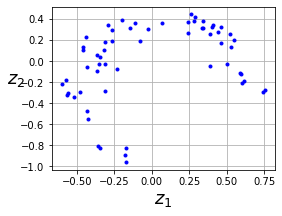

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

The autoencoder found the best 2D plane to project the data onto, preserving as much variance in the data as it could (just like PCA).

### Implementing a Stacked Autoencoder

In [3]:
stacked_encoder = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(100, activation="selu"), 
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([ 
    keras.layers.Dense(100, activation="selu", input_shape=[30]), 
    keras.layers.Dense(28 * 28, activation="sigmoid"), 
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.5))

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

history = stacked_ae.fit(X_train, X_train, batch_size=100, epochs=50, validation_data=(X_valid, X_valid))

Epoch 1/50
550/550 [==============================] - 1s 2ms/step - loss: 0.3771 - val_loss: 0.3295
Epoch 2/50
550/550 [==============================] - ETA: 0s - loss: 0.321 - 1s 1ms/step - loss: 0.3209 - val_loss: 0.3117
Epoch 3/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3122 - val_loss: 0.3076
Epoch 4/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3076 - val_loss: 0.3034
Epoch 5/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3044 - val_loss: 0.2992
Epoch 6/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3020 - val_loss: 0.2995
Epoch 7/50
550/550 [==============================] - 1s 1ms/step - loss: 0.2997 - val_loss: 0.2948
Epoch 8/50
550/550 [==============================] - 1s 1ms/step - loss: 0.2978 - val_loss: 0.2939
Epoch 9/50
550/550 [==============================] - 1s 1ms/step - loss: 0.2963 - val_loss: 0.2918
Epoch 10/50
550/550 [==============================] - 1s 1ms/step - loss: 0

**NOTE**: When compiling the stacked autoencoder, we use the binary cross-entropy loss instead of the mean squared error. We are treating the reconstruction task as a multilabel binary classification problem: each pixel intensity represents the probability that the pixel should be black. Framing it this way (rather than as a regression problem) tends to make the model converge faster.

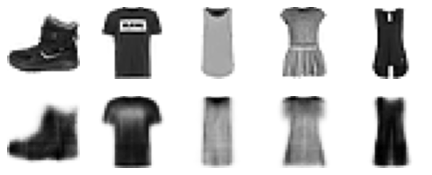

In [4]:
import matplotlib.pyplot as plt

def plot_image(image): 
    plt.imshow(image, cmap="binary") 
    plt.axis("off")
    
def show_reconstructions(model, n_images=5): 
    reconstructions = model.predict(X_valid[:n_images]) 
    fig = plt.figure(figsize=(n_images * 1.5, 3)) 
    for image_index in range(n_images): 
        plt.subplot(2, n_images, 1 + image_index) 
        plot_image(X_valid[image_index]) 
        plt.subplot(2, n_images, 1 + n_images + image_index) 
        plot_image(reconstructions[image_index]) 
        
show_reconstructions(stacked_ae)

### Visualizing the Fashion MNIST Dataset

One big advantage of autoencoders is that they
can handle large datasets, with many instances and many features. So one
strategy is to use an autoencoder to reduce the dimensionality down to a
reasonable level, then use another dimensionality reduction algorithm for
visualization. First, we use the encoder from our stacked autoencoder to reduce the dimensionality
down to 30, then we use Scikit-Learn's implementation of the t-SNE
algorithm to reduce the dimensionality down to 2 for visualization.

In [5]:
from sklearn.manifold import TSNE 
 
X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())
# plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
# plt.axis("off")

/gpfs/home5/p285464/dataScienceEnv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/gpfs/home5/p285464/dataScienceEnv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(0.006402492523193359,
 1.047314167022705,
 -0.043569919466972355,
 0.9149683088064193)

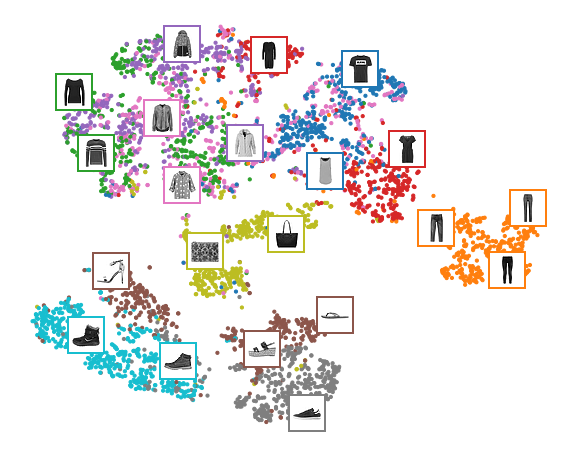

In [6]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")

### Convolutional Autoencoders

In [7]:
conv_encoder = keras.models.Sequential([ 
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]), 
    keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"), 
    keras.layers.MaxPool2D(pool_size=2), 
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"), 
    keras.layers.MaxPool2D(pool_size=2), 
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="selu"), 
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([ 
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid", 
                                 activation="selu", input_shape=[3, 3, 64]), 
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same", 
                                 activation="selu"), 
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same", 
                                 activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])
conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.5))

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

history = conv_ae.fit(X_train, X_train, batch_size=100, epochs=50, validation_data=(X_valid, X_valid))

Epoch 1/50


2021-12-02 23:41:28.210977: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201


550/550 [==============================] - 5s 2ms/step - loss: 0.3277 - val_loss: 0.2867
Epoch 2/50
550/550 [==============================] - 1s 2ms/step - loss: 0.2869 - val_loss: 0.2791
Epoch 3/50
550/550 [==============================] - 1s 2ms/step - loss: 0.2797 - val_loss: 0.2729
Epoch 4/50
550/550 [==============================] - 1s 2ms/step - loss: 0.2759 - val_loss: 0.2718
Epoch 5/50
550/550 [==============================] - 1s 2ms/step - loss: 0.2734 - val_loss: 0.2694
Epoch 6/50
550/550 [==============================] - 1s 2ms/step - loss: 0.2717 - val_loss: 0.2675
Epoch 7/50
550/550 [==============================] - 1s 2ms/step - loss: 0.2702 - val_loss: 0.2669
Epoch 8/50
550/550 [==============================] - 1s 2ms/step - loss: 0.2691 - val_loss: 0.2641
Epoch 9/50
550/550 [==============================] - 1s 2ms/step - loss: 0.2681 - val_loss: 0.2646
Epoch 10/50
550/550 [==============================] - 1s 2ms/step - loss: 0.2672 - val_loss: 0.2640
Epoch 11/5

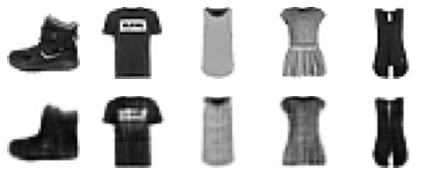

In [8]:
show_reconstructions(conv_ae)

### Denoising Autoencoders

The noise can be pure Gaussian noise added to the inputs, or it can be
randomly switched-off inputs, just like in dropout.

<img src="images/AutoEnc2.png" align="center" width="300"/>

In [9]:
dropout_encoder = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(100, activation="selu"), 
    keras.layers.Dense(30, activation="selu")
])
dropout_decoder = keras.models.Sequential([ 
    keras.layers.Dense(100, activation="selu", input_shape=[30]), 
    keras.layers.Dense(28 * 28, activation="sigmoid"), 
    keras.layers.Reshape([28, 28])
])
dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.5))

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

history = dropout_ae.fit(X_train, X_train, batch_size=100, epochs=50, validation_data=(X_valid, X_valid))

Epoch 1/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3897 - val_loss: 0.3336
Epoch 2/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3297 - val_loss: 0.3160
Epoch 3/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3218 - val_loss: 0.3132
Epoch 4/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3181 - val_loss: 0.3086
Epoch 5/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3151 - val_loss: 0.3062
Epoch 6/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3127 - val_loss: 0.3033
Epoch 7/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3107 - val_loss: 0.3023
Epoch 8/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3092 - val_loss: 0.2999
Epoch 9/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3080 - val_loss: 0.3025
Epoch 10/50
550/550 [==============================] - 1s 1ms/step - loss: 0.3070 - val_loss: 0.2976

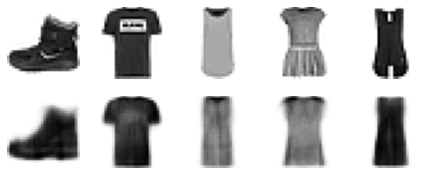

In [10]:
show_reconstructions(dropout_ae)

### Variational Autoencoders

<img src="images/AutoEnc3.png" align="right" width="400"/>

They are quite different from all the autoencoders we have discussed so far,
in these particular ways:

- They are _probabilistic autoencoders_, meaning that their outputs are
partly determined by chance, even after training (as opposed to
denoising autoencoders, which use randomness only during
training).
- Most importantly, they are _generative autoencoders_, meaning that
they can generate new instances that look like they were sampled
from the training set.
- As their name suggests, variational autoencoders perform variational 
Bayesian inference, which is an efficient way to perform approximate 
Bayesian inference.
- Recognize the basic structure of all autoencoders, with
an encoder followed by a decoder (in this example, they both have two
hidden layers), but there is a twist: instead of directly producing a coding
for a given input, the encoder produces a _mean coding_ $\mathbf{\mu}$ and a standard
deviation $\mathbf{\sigma}$. The actual coding is then sampled randomly from a Gaussian
distribution with mean $\mathbf{\mu}$ and standard deviation $\mathbf{\sigma}$. After that the decoder
decodes the sampled coding normally. The right part of the diagram shows
a training instance going through this autoencoder. First, the encoder
produces $\mathbf{\mu}$ and $\mathbf{\sigma}$, then a coding is sampled randomly (notice that it is not
exactly located at $\mathbf{\mu}$), and finally this coding is decoded; the final output
resembles the training instance.

<img src="images/AutoEnc4.png" align="right" width="400"/>

- Although the inputs may have a very
convoluted distribution, a variational autoencoder tends to produce codings
that look as though they were sampled from a simple Gaussian
distribution: during training, the cost function pushes the
codings to gradually migrate within the coding space (also called the _latent
space_) to end up looking like a cloud of Gaussian points. One great
consequence is that after training a variational autoencoder, you can very
easily generate a new instance: just sample a random coding from the
Gaussian distribution, decode it, and voilà!
- The cost function is composed of two parts. The first is
the usual reconstruction loss that pushes the autoencoder to reproduce its
inputs. The second is the _latent loss_ that pushes the autoencoder to have codings that look as
though they were sampled from a simple Gaussian distribution: it is the KL
divergence between the target distribution (i.e., the Gaussian distribution)
and the actual distribution of the codings.

In [11]:
# a custom layer to sample the codings, given mean and gamma
import tensorflow as tf
K = keras.backend

class Sampling(keras.layers.Layer): 
    def call(self, inputs): 
        mean, log_var = inputs 
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [12]:
codings_size = 10 

# encoder using a Functional API
encoder_inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(encoder_inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)  # mean
codings_log_var = keras.layers.Dense(codings_size)(z)  # gamma
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.Model( 
    inputs=[encoder_inputs], outputs=[codings_mean, codings_log_var, codings])

# decoder using a Functional API
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.Model(inputs=[decoder_inputs], outputs=[outputs])

# variational_ae
_, _, codings = variational_encoder(encoder_inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[encoder_inputs], outputs=[reconstructions])

# add the latent loss and the reconstruction loss
latent_loss = -0.5 * K.sum( 
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean), 
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop")
history = variational_ae.fit(X_train, X_train, epochs=50, batch_size=128, 
                             validation_data=(X_valid, X_valid))

Epoch 1/50
430/430 [==============================] - 3s 4ms/step - loss: 0.3875 - val_loss: 0.3544
Epoch 2/50
430/430 [==============================] - 1s 3ms/step - loss: 0.3438 - val_loss: 0.3348
Epoch 3/50
430/430 [==============================] - 1s 3ms/step - loss: 0.3335 - val_loss: 0.3249
Epoch 4/50
430/430 [==============================] - 1s 3ms/step - loss: 0.3284 - val_loss: 0.3226
Epoch 5/50
430/430 [==============================] - 1s 3ms/step - loss: 0.3252 - val_loss: 0.3206
Epoch 6/50
430/430 [==============================] - 1s 3ms/step - loss: 0.3230 - val_loss: 0.3207
Epoch 7/50
430/430 [==============================] - 1s 3ms/step - loss: 0.3215 - val_loss: 0.3163
Epoch 8/50
430/430 [==============================] - 1s 3ms/step - loss: 0.3201 - val_loss: 0.3174
Epoch 9/50
430/430 [==============================] - 1s 3ms/step - loss: 0.3191 - val_loss: 0.3188
Epoch 10/50
430/430 [==============================] - 1s 3ms/step - loss: 0.3182 - val_loss: 0.3144

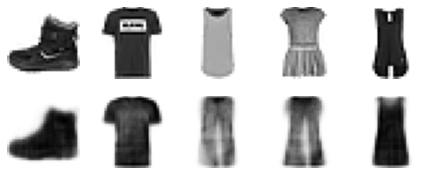

In [13]:
show_reconstructions(variational_ae)

#### Generating Fashion MNIST Images

In [14]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

##### _Sampling from Variation Autoencoder_:

- All we need to do is sample random codings from a Gaussian distribution and decode them

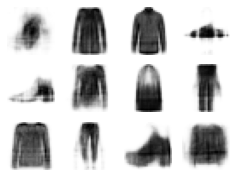

In [15]:
codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)

##### _Interepolation at Codings Level_

- Variational autoencoders make it possible to perform semantic
interpolation: instead of interpolating two images at the pixel level (which
would look as if the two images were overlaid), we can interpolate at the
codings level. We first run both images through the encoder, then we
interpolate the two codings we get, and finally we decode the interpolated
codings to get the final image. It will look like a regular Fashion MNIST
image, but it will be an intermediate between the original images. In the
following code example, we take the 12 codings we just generated, we
organize them in a 3×4 grid, and we use TensorFlow's
```tf.image.resize()``` function to resize this grid to 5×7. By default, the
```resize()``` function will perform bilinear interpolation, so every other row
and column will contain interpolated codings. We then use the decoder to
produce all the images.

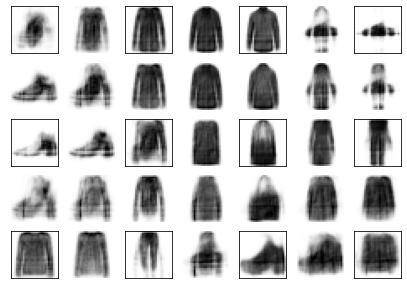

In [16]:
codings_grid = tf.reshape(codings, [1, 3, 4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()

plt.figure(figsize=(7, 5))
for index, image in enumerate(images):
    plt.subplot(5, 7, index + 1)
    if index%7%2==0 and index//7%2==0:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    else:
        plt.axis("off")
    plt.imshow(image, cmap="binary")

## Generative Adversarial Networks

- [How GANs work](How GANs work)
- []

For several years, variational autoencoders were quite popular, but GANs
eventually took the lead, in particular because they are capable of
generating much more realistic and crisp images.

<img src="images/AutoEnc7.png" align="right" width="400"/>


A GAN is composed of two neural networks:

- Generator: Takes a random distribution as input (typically Gaussian) and outputs
some data -- typically, an image. You can think of the random inputs as
the latent representations (i.e., codings) of the image to be generated.
So, as you can see, the generator offers the same functionality as a
decoder in a variational autoencoder, and it can be used in the same way
to generate new images (just feed it some Gaussian noise, and it outputs
a brand-new image). However, it is trained very differently.
- Discriminator: Takes either a fake image from the generator or a real image from the
training set as input, and must guess whether the input image is fake or
real.

During training, the generator and the discriminator have opposite goals:
the discriminator tries to tell fake images from real images, while the
generator tries to produce images that look real enough to trick the
discriminator. Because the GAN is composed of two networks with
different objectives, it cannot be trained like a regular neural network. Each
training iteration is divided into two phases:

- In the first phase, we train the discriminator. A batch of real images
is sampled from the training set and is completed with an equal
number of fake images produced by the generator. The labels are
set to 0 for fake images and 1 for real images, and the
discriminator is trained on this labeled batch for one step, using the
binary cross-entropy loss. Importantly, backpropagation only
optimizes the weights of the discriminator during this phase.
- In the second phase, we train the generator. We first use it to
produce another batch of fake images, and once again the
discriminator is used to tell whether the images are fake or real.
This time we do not add real images in the batch, and all the labels
are set to 1 (real): in other words, we want the generator to produce
images that the discriminator will (wrongly) believe to be real!
Crucially, the weights of the discriminator are frozen during this
step, so backpropagation only affects the weights of the generator.

**NOTE**: The generator never actually sees any real images, yet it gradually learns to produce
convincing fake images! All it gets is the gradients flowing back through the
discriminator. Fortunately, the better the discriminator gets, the more information about
the real images is contained in these secondhand gradients, so the generator can make
significant progress

The generator is similar to an autoencoder's decoder, and the discriminator is a regular
binary classifier (it takes an image as input and ends with a Dense layer
containing a single unit and using the sigmoid activation function). 

For the second phase of each training iteration, we also need the full GAN model
containing the generator followed by the discriminator.

In [17]:
codings_size = 30 
 
generator = keras.models.Sequential([ 
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]), 
    keras.layers.Dense(150, activation="selu"), 
    keras.layers.Dense(28 * 28, activation="sigmoid"), 
    keras.layers.Reshape([28, 28])
])
discriminator = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(150, activation="selu"), 
    keras.layers.Dense(100, activation="selu"), 
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

Next, we need to compile these models. As the discriminator is a binary
classifier, we can naturally use the binary cross-entropy loss. The generator
will only be trained through the gan model, so we do not need to compile it
at all. The gan model is also a binary classifier, so it can use the binary
cross-entropy loss. Importantly, the discriminator should not be trained
during the second phase, so we make it non-trainable before compiling the
gan model:

In [18]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

**NOTE**: The trainable attribute is taken into account by Keras only when compiling a model,
so after running this code, the ```discriminator``` _is_ trainable if we call its ```fit()``` method
or its ```train_on_batch()``` method (which we will be using), while it is not trainable
when we call these methods on the ```gan``` model.

In [19]:
batch_size = 128
dataset = tf.data.Dataset.from_tensor_slices(np.array(X_train, dtype=np.float32)).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [20]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50): 
    generator, discriminator = gan.layers 
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))
        for X_batch in dataset: 
            # phase 1 - training the discriminator 
            noise = tf.random.normal(shape=(batch_size, codings_size), dtype=tf.float64) 
            generated_images = generator(noise) 
            X_fake_and_real = tf.concat((generated_images, X_batch), axis=0) 
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size) 
            discriminator.trainable = True 
            discriminator.train_on_batch(X_fake_and_real, y1) 
            # phase 2 - training the generator 
            noise = tf.random.normal(shape=[batch_size, codings_size]) 
            y2 = tf.constant([[1.]] * batch_size) 
            discriminator.trainable = False 
            gan.train_on_batch(noise, y2) 
            
train_gan(gan, dataset, batch_size, codings_size)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


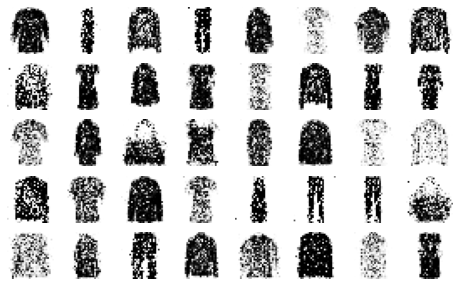

In [21]:
noise = tf.random.normal(shape=[40, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)

### The Difficulties of Training GANs

- The biggest difficulty is called _mode collapse_: this is when the generator??s
outputs gradually become less diverse. How can this happen? Suppose that
the generator gets better at producing convincing shoes than any other class.
It will fool the discriminator a bit more with shoes, and this will encourage
it to produce even more images of shoes. Gradually, it will forget how to
produce anything else. Meanwhile, the only fake images that the
discriminator will see will be shoes, so it will also forget how to
discriminate fake images of other classes. Eventually, when the
discriminator manages to discriminate the fake shoes from the real ones, the
generator will be forced to move to another class. It may then become good
at shirts, forgetting about shoes, and the discriminator will follow. The
GAN may gradually cycle across a few classes, never really becoming very
good at any of them.
- Moreover, because the generator and the discriminator are constantly
pushing against each other, their parameters may end up oscillating and
becoming unstable. Training may begin properly, then suddenly diverge for
no apparent reason, due to these instabilities. And since many factors affect
these complex dynamics, GANs are very sensitive to the hyperparameters:
you may have to spend a lot of effort fine-tuning them.

### Deep Convolutional GANs (DCGANs)

Main guidelines proposed for building stable convolutional GANs:
- Replace any pooling layers with strided convolutions (in the
discriminator) and transposed convolutions (in the generator).
- Use Batch Normalization in both the generator and the
discriminator, except in the generator's output layer and the
discriminator's input layer.
- Remove fully connected hidden layers for deeper architectures.
- Use ReLU activation in the generator for all layers except the
output layer, which should use tanh.
- Use leaky ReLU activation in the discriminator for all layers.

In [22]:
codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                 activation="tanh"),
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [23]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

**NOTE**: The 2nd upscaling (Conv2DTranspose) layer 
uses the tanh activation function, so the outputs will range from ??1 to 1. For
this reason, before training the GAN, we need to rescale the training set to
that same range

In [24]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale
batch_size = 128
dataset = tf.data.Dataset.from_tensor_slices(np.array(X_train_dcgan, dtype=np.float32))
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [25]:
train_gan(gan, dataset, batch_size, codings_size)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


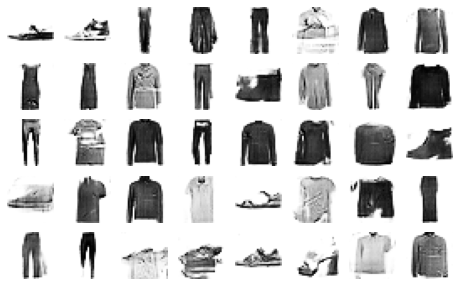

In [26]:
noise = tf.random.normal(shape=[40, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)